# CESM Workshop Figures (2021

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png,calculate,dual_mask
    )

from cloud_metric import Cloud_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find the files

In [2]:
case_dir = '/glade/u/home/jonahshaw/w/archive/Kay_COSP_2012/'

### Load post-processed CAM4 and CAM5 files into a cloud metric

In [3]:
fig2metric = Cloud_Metric(case_dir)
fig2metric.add_case('cam4_1deg_release_amip',label='CAM4',t_range=('2001-01','2010-12'))
fig2metric.add_case('cam5_1deg_release_amip',label='CAM5',t_range=('2001-01','2010-12'))
fig2metric.add_case(case='f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1',
                    path='/glade/p/cesm/pcwg/jenkay/COSP/cesm21/',label='CAM6',t_range=('2001-01','2010-12'))

# fig2metric = Cloud_Metric(case_dir)
# fig2metric.add_case('cam4_1deg_release_amip',label='CAM4')
# fig2metric.add_case('cam5_1deg_release_amip',label='CAM5')
# fig2metric.add_case(case='f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1',path='/glade/p/cesm/pcwg/jenkay/COSP/cesm21/',label='CAM6 CMIP6 AMIP')
old_colors = fig2metric.colors.copy() # weird, I didn't expect this to follow

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Processed timeseries directory found for cam4_1deg_release_amip. Will load data as required.
cam4_1deg_release_amip load successfully.
Processed timeseries directory found for cam5_1deg_release_amip. Will load data as required.
cam5_1deg_release_amip load successfully.
Processed timeseries directory found for f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1. Will load data as required.
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1 load successfully.


In [4]:
fig2metric.colors[0] = 'grey' # the orange is good
fig2metric.colors[1] = 'blue'
fig2metric.colors[2] = 'red'

test2 = fig2metric.plot1D('SWCF',asymm=True)

fig2metric.colors = old_colors

In [5]:
test2[0].axes[0].legend(labels=['Obs','CAM4','CAM5','CAM6'],loc=(0.7,0.7))

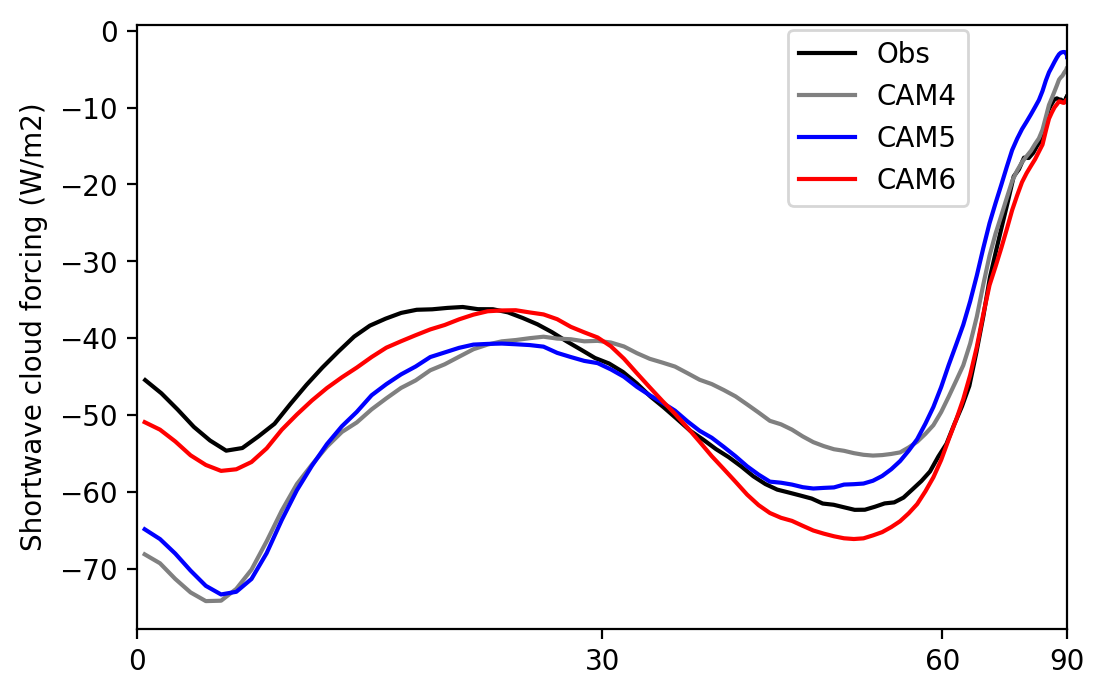

In [6]:
test2[0]

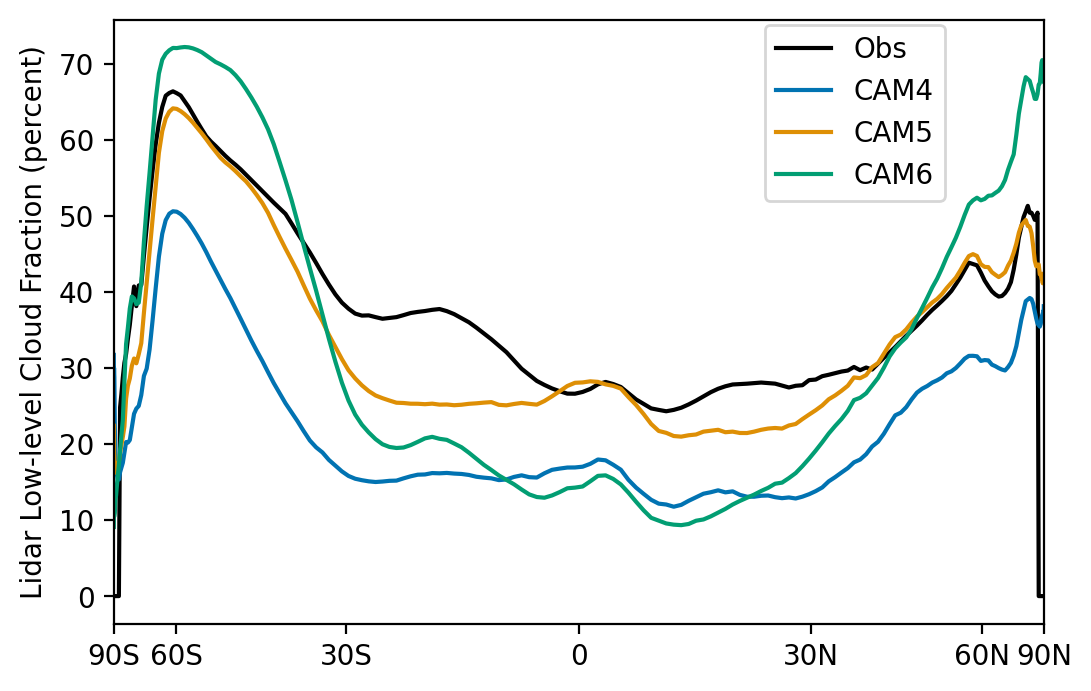

In [66]:
out = fig2metric.plot1D('CLDLOW_CAL',layers=False)

out[0].axes[0].legend(labels=['Obs','CAM4','CAM5','CAM6'],loc=(0.7,0.7))


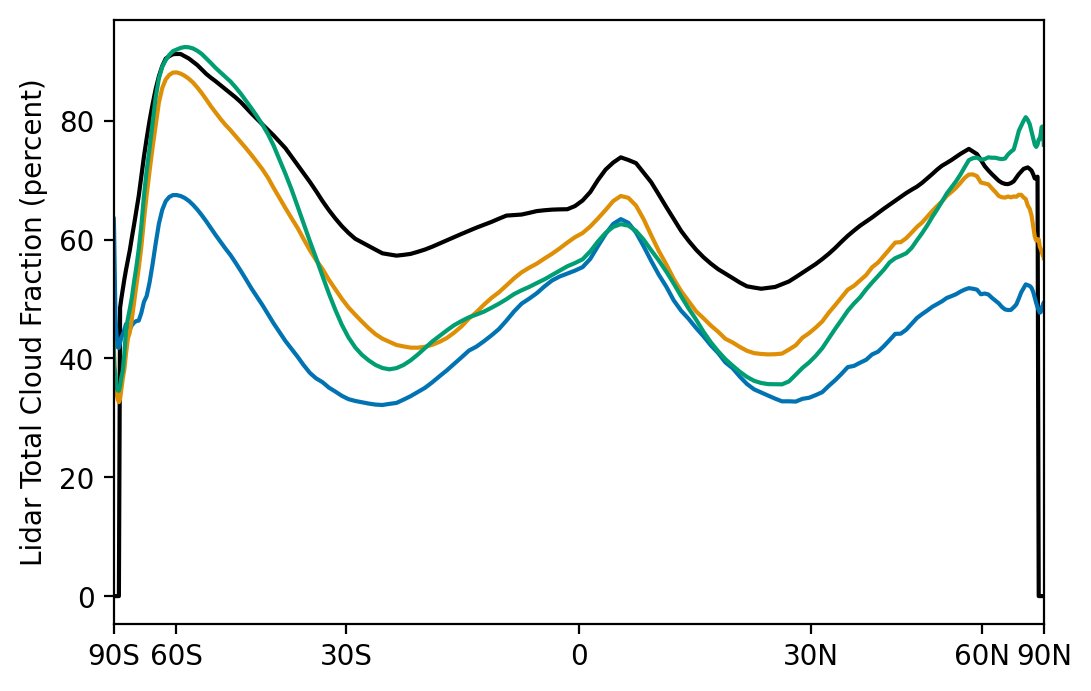

In [24]:
out = fig2metric.plot1D('CLDTOT_CAL',layers=False) # I disabled the legend manual here (line 447 of the metric)

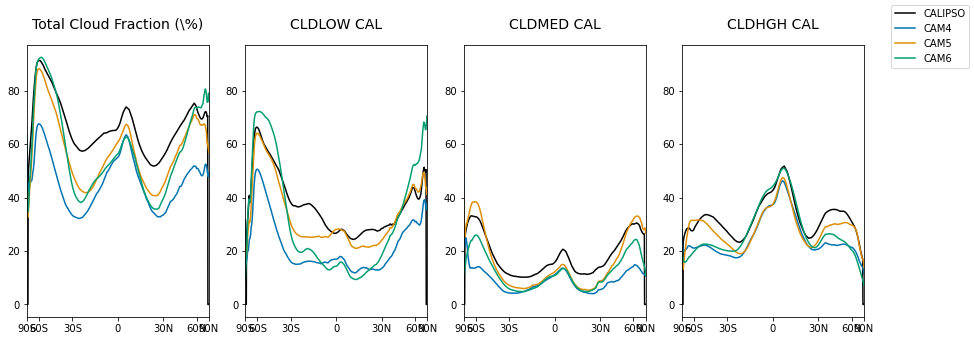

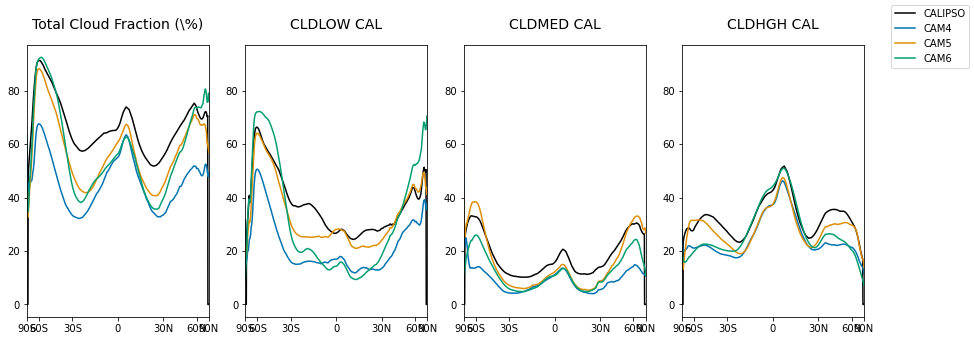

In [19]:
fig2metric.plot1D('CLD_CAL',layers=True)